In [1]:
!kaggle datasets download -d babyoda/women-entrepreneurship-and-labor-force


  0%|          | 0.00/1.26k [00:00<?, ?B/s]
100%|##########| 1.26k/1.26k [00:00<?, ?B/s]


In [2]:
!unzip women-entrepreneurship-and-labor-force.zip

Archive:  women-entrepreneurship-and-labor-force.zip
  inflating: Dataset3.csv            


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

In [4]:
data = pd.read_csv('women-entrepreneurship-and-labor-force.zip', delimiter=';', encoding = "ISO-8859-1")

In [5]:
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [6]:
data.drop('No',1,inplace=True)


In [7]:
data.isnull().sum()


Country                                  0
Level of development                     0
European Union Membership                0
Currency                                 0
Women Entrepreneurship Index             0
Entrepreneurship Index                   0
Inflation rate                           0
Female Labor Force Participation Rate    0
dtype: int64

In [8]:
data.dtypes


Country                                   object
Level of development                      object
European Union Membership                 object
Currency                                  object
Women Entrepreneurship Index             float64
Entrepreneurship Index                   float64
Inflation rate                           float64
Female Labor Force Participation Rate    float64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
le = LabelEncoder()
lb = LabelBinarizer()
data['Country'].unique()
country = {'Austria':1, 'Belgium':2, 'Estonia':3, 'Finland':4, 'France':5, 'Germany':6,
       'Greece':7, 'Ireland':8, 'Italy':9, 'Latvia':10, 'Lithuania':11, 'Netherlands':12,
       'Slovakia':13, 'Slovenia':14, 'Spain':15, 'Croatia':16, 'Denmark':17, 'Hungary':18,
       'Poland':19, 'Sweden':20, 'Australia':21, 'Iceland':22, 'Japan':23, 'Norway':24,
       'Singapore':25, 'Switzerland':26, 'Taiwan':27, 'Algeria':28, 'Argentina':29,
       'Bolivia':30, 'Bosnia and Herzegovina':31, 'Brazil':32, 'China':33,
       'Costa Rica':34, 'Ecuador':35, 'Egypt':36, 'El Salvador':37, 'Ghana':38, 'India':39,
       'Jamaica':40, 'Macedonia':41, 'Malaysia':42, 'Mexico':43, 'Panama':44, 'Peru':45,
       'Russia':46, 'Saudi Arabia':47, 'Thailand':48, 'Tunisia':49, 'Turkey':50,
       'Uruguay':51}
data['country'] = data['Country'].map(country)
data['European Union Membership'] = lb.fit_transform(data['European Union Membership'])
data['Currency'] = lb.fit_transform(data['Currency'])
data['Level of development'] = le.fit_transform(data['Level of development'])


In [10]:
data.head()

,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,country
0,Austria,0,0,0,54.9,64.9,0.90,67.1,1
1,Belgium,0,0,0,63.6,65.5,0.60,58.0,2
2,Estonia,0,0,0,55.4,60.2,-0.88,68.5,3
3,Finland,0,0,0,66.4,65.7,-0.20,67.7,4
4,France,0,0,0,68.8,67.3,0.00,60.6,5


In [11]:
data.describe()


,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,country
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.470588,0.607843,0.705882,47.835294,47.241176,2.587647,58.481765,26.000000
std,0.504101,0.493089,0.460179,14.268480,16.193149,5.380639,13.864567,14.866069
min,0.000000,0.000000,0.000000,25.300000,24.800000,-2.250000,13.000000,1.000000
25%,0.000000,0.000000,0.000000,36.350000,31.900000,-0.500000,55.800000,13.500000
50%,0.000000,1.000000,1.000000,44.500000,42.700000,0.600000,61.000000,26.000000
75%,1.000000,1.000000,1.000000,59.150000,65.400000,3.600000,67.400000,38.500000
max,1.000000,1.000000,1.000000,74.800000,77.600000,26.500000,82.300000,51.000000


<AxesSubplot:>

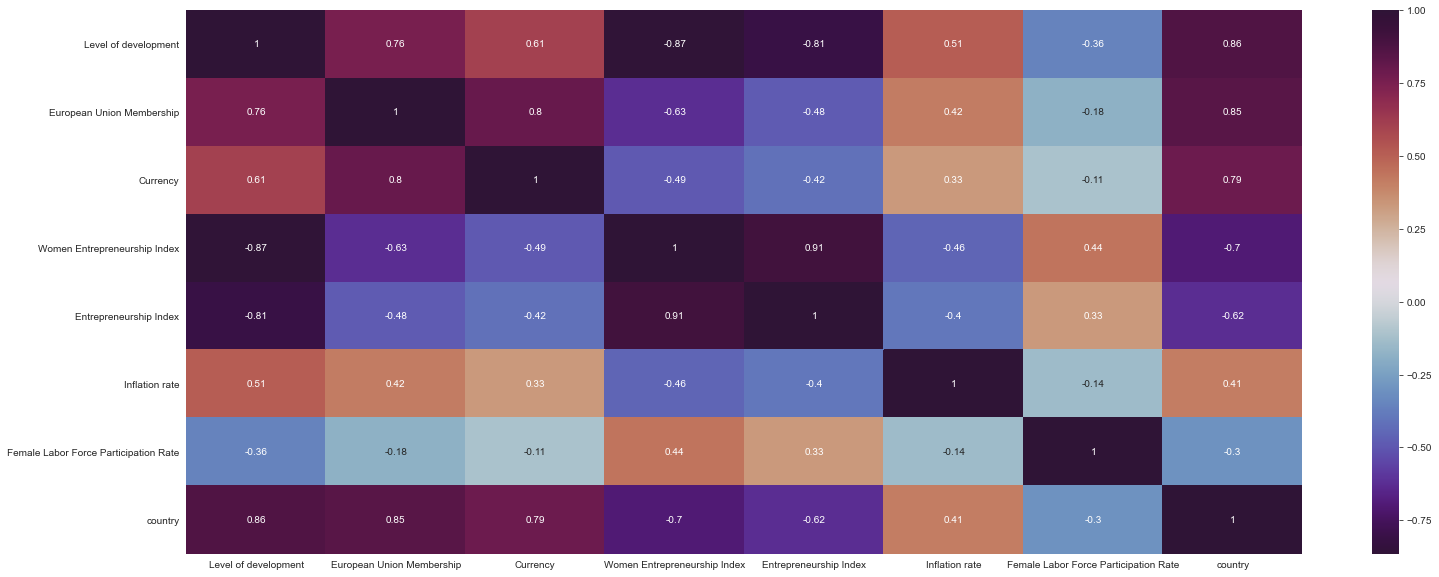

In [12]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot=True,cmap = 'twilight_shifted')

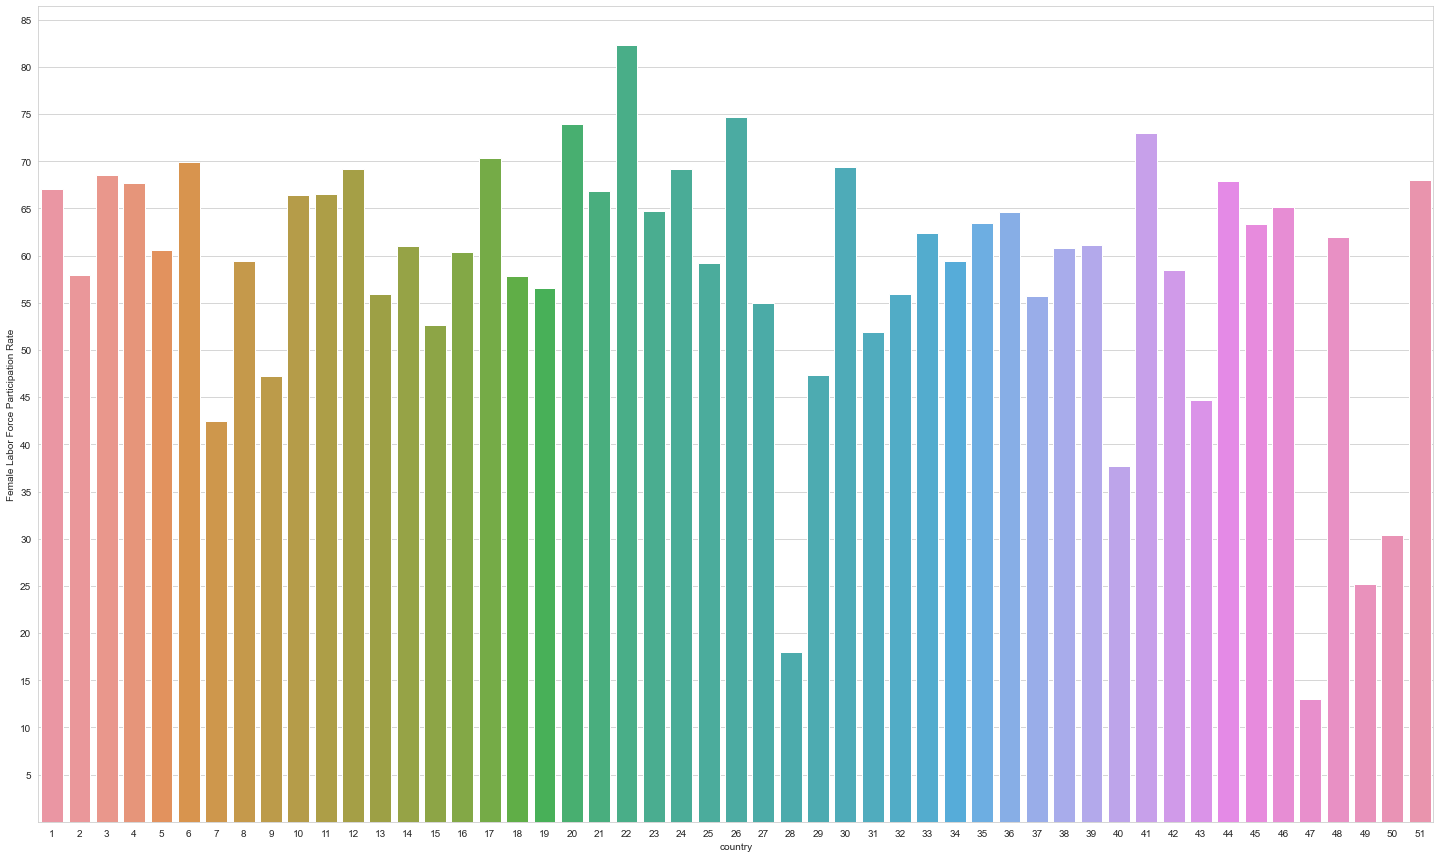

In [13]:
plt.figure(figsize = (25,15))
sb.barplot(x= data['country'],y = data['Female Labor Force Participation Rate']);
plt.yticks([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]);

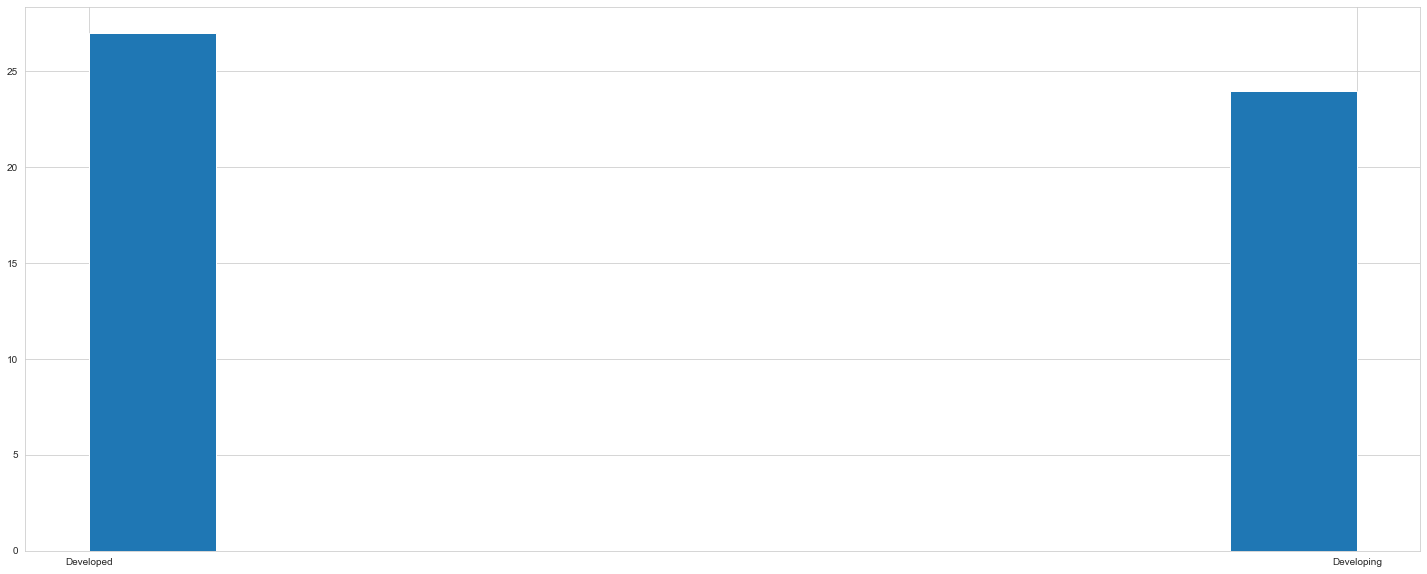

In [14]:
plt.figure(figsize = (25,10))
plt.hist(data['Level of development']);
plt.xticks(ticks = [0,1],labels = ['Developed','Developing']);

<AxesSubplot:xlabel='Level of development', ylabel='Female Labor Force Participation Rate'>

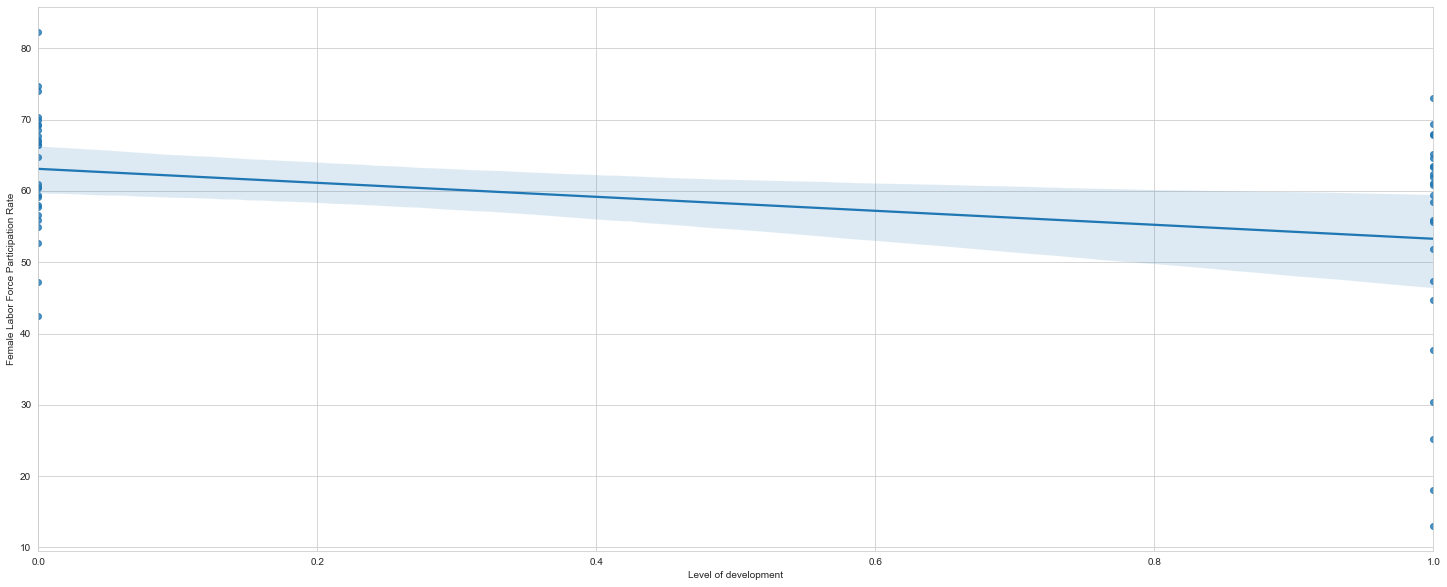

In [15]:
plt.figure(figsize = (25,10))
sb.regplot(x = data['Level of development'],y=data['Female Labor Force Participation Rate'])

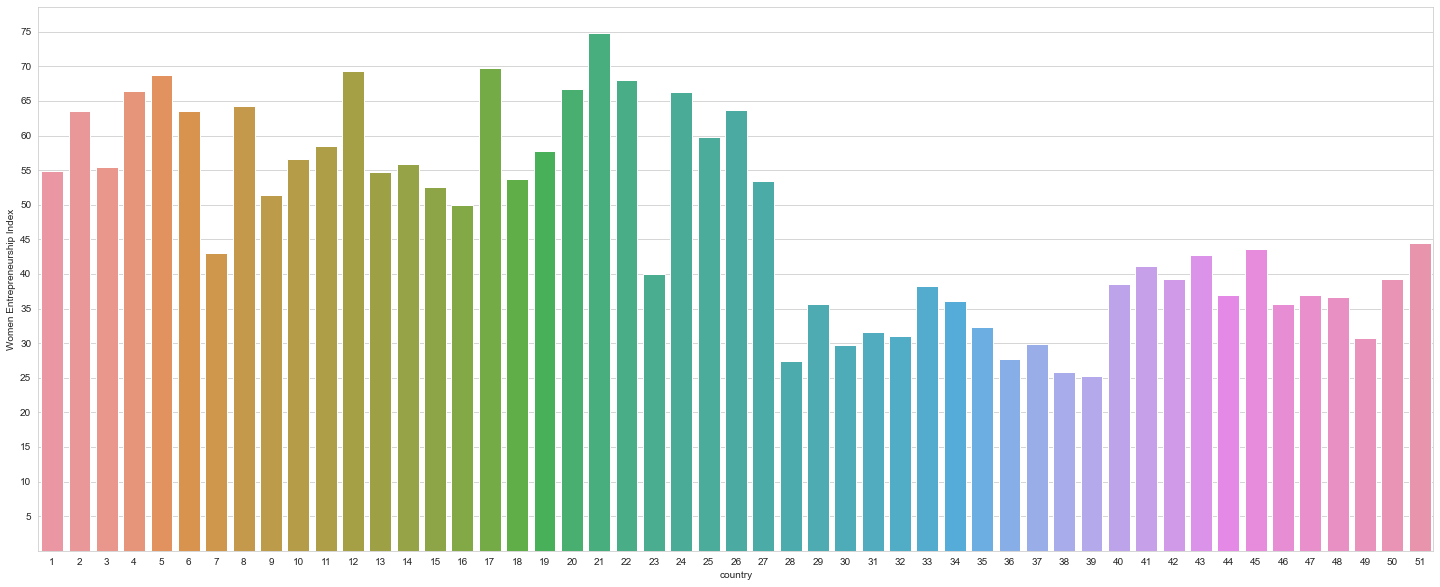

In [16]:
plt.figure(figsize = (25,10))
sb.barplot(x= data['country'],y = data['Women Entrepreneurship Index']);
plt.yticks([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]);

<AxesSubplot:xlabel='Women Entrepreneurship Index', ylabel='Female Labor Force Participation Rate'>

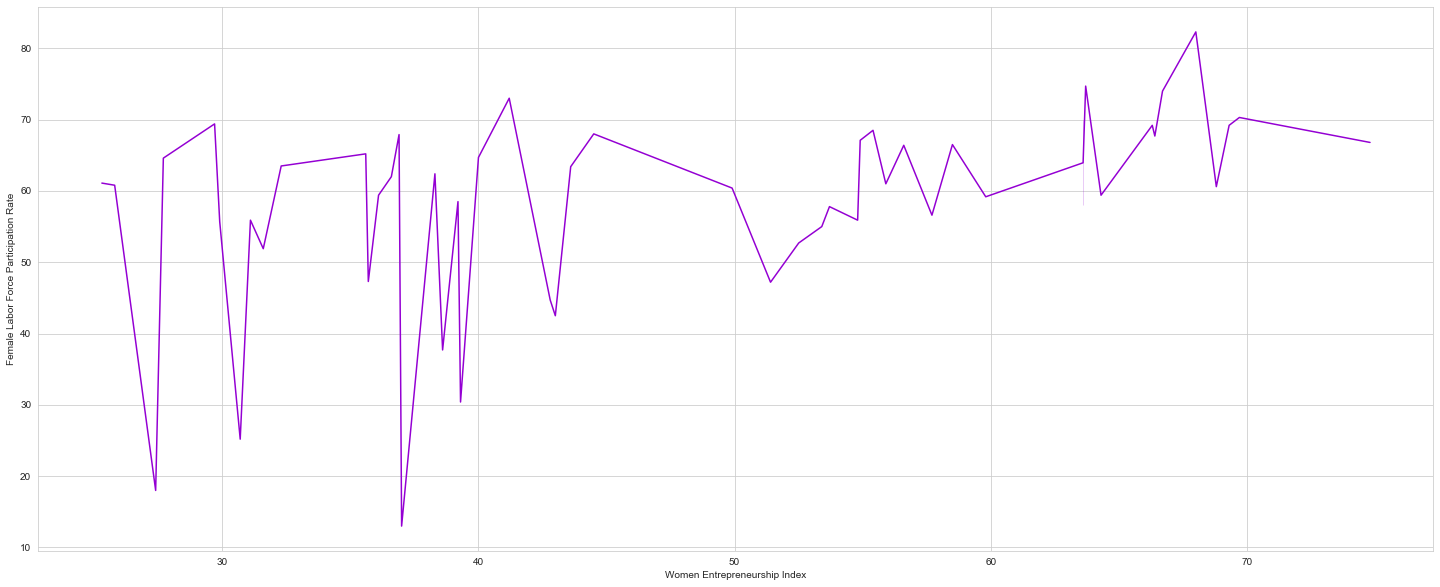

In [17]:
plt.figure(figsize = (25,10))
sb.lineplot(x = data['Women Entrepreneurship Index'],y = data['Female Labor Force Participation Rate'],color = 'darkviolet')

<AxesSubplot:xlabel='Women Entrepreneurship Index', ylabel='Female Labor Force Participation Rate'>

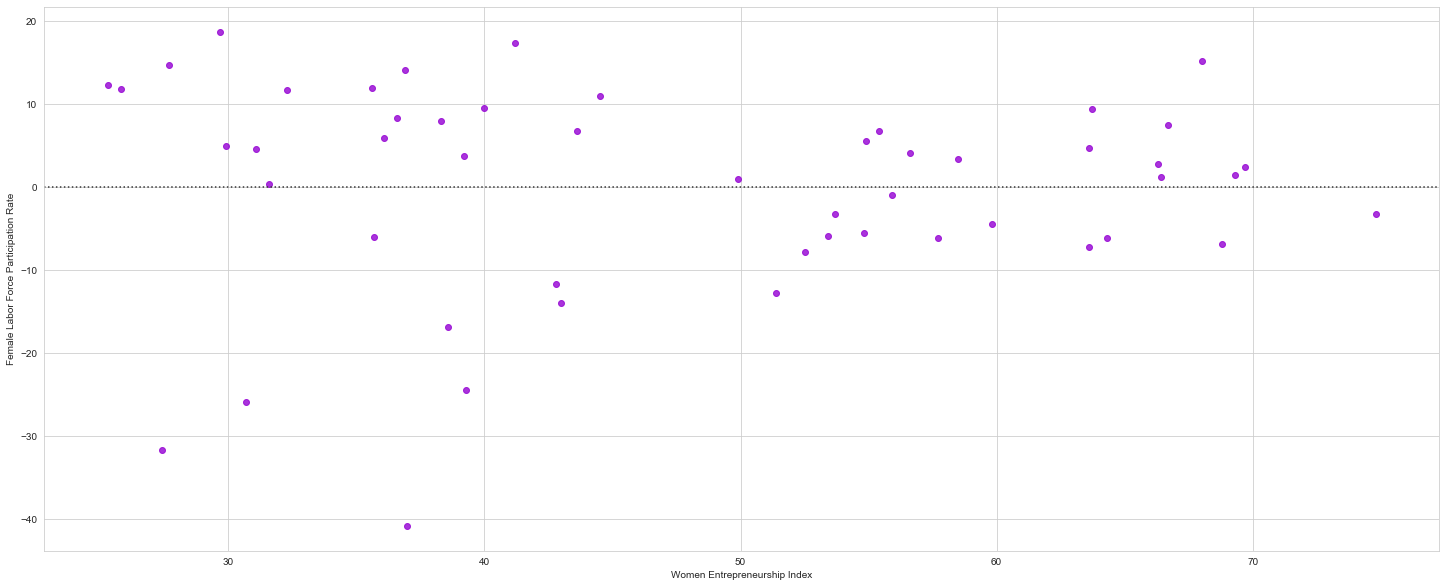

In [18]:
plt.figure(figsize = (25,10))
sb.residplot(x = data['Women Entrepreneurship Index'],y = data['Female Labor Force Participation Rate'],color = 'darkviolet')

<AxesSubplot:xlabel='Women Entrepreneurship Index', ylabel='Female Labor Force Participation Rate'>

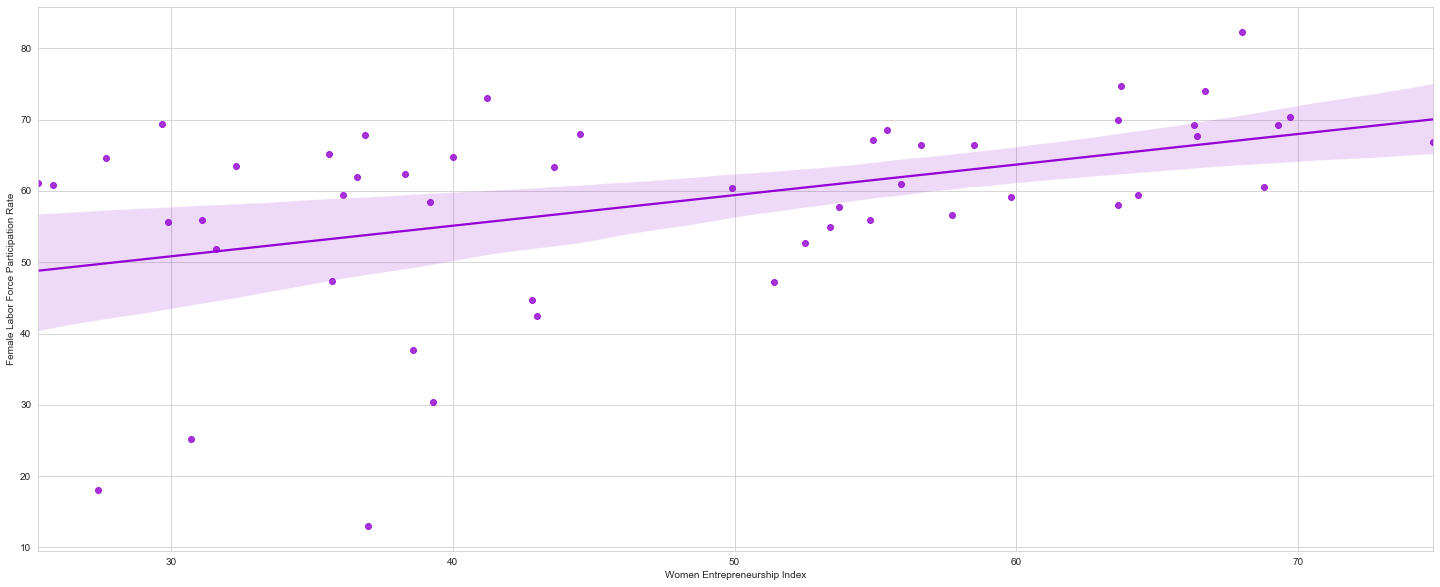

In [19]:
plt.figure(figsize = (25,10))
sb.regplot(x = data['Women Entrepreneurship Index'],y = data['Female Labor Force Participation Rate'],color = 'darkviolet')

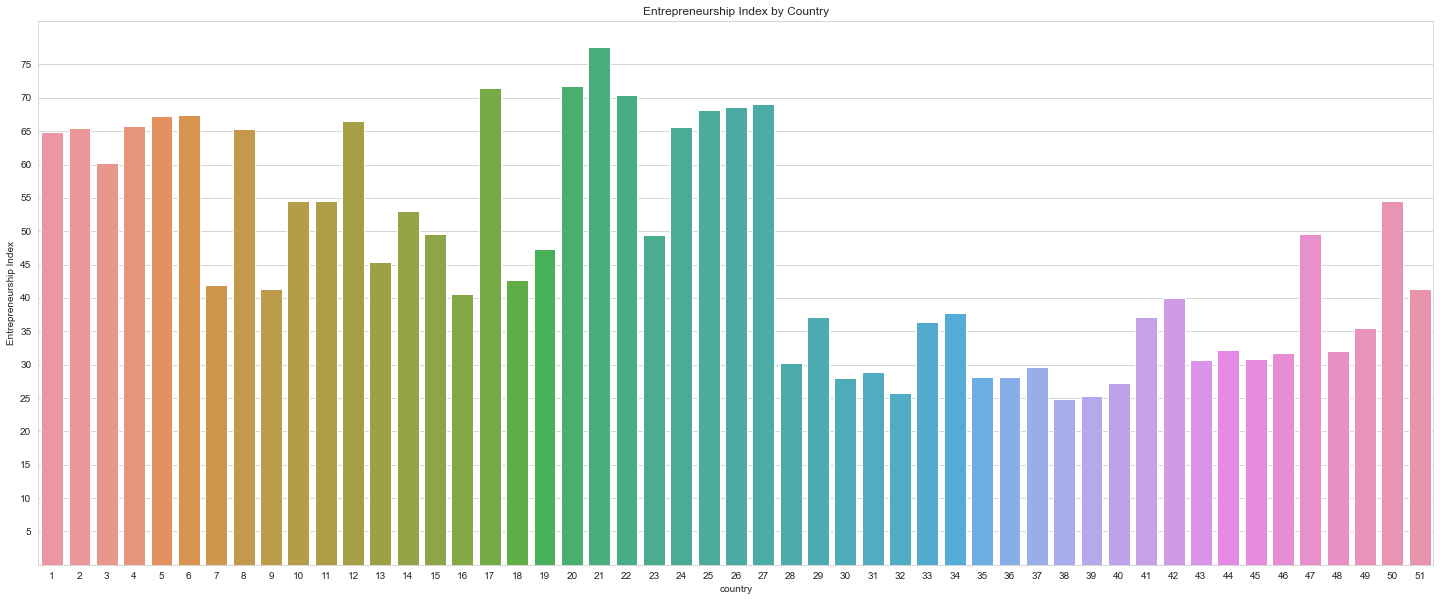

In [20]:
plt.figure(figsize = (25,10))
sb.barplot(x= data['country'],y = data['Entrepreneurship Index']);
plt.yticks([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]);
       #'Uruguay':51#
plt.title('Entrepreneurship Index by Country');

<AxesSubplot:xlabel='Entrepreneurship Index', ylabel='Women Entrepreneurship Index'>

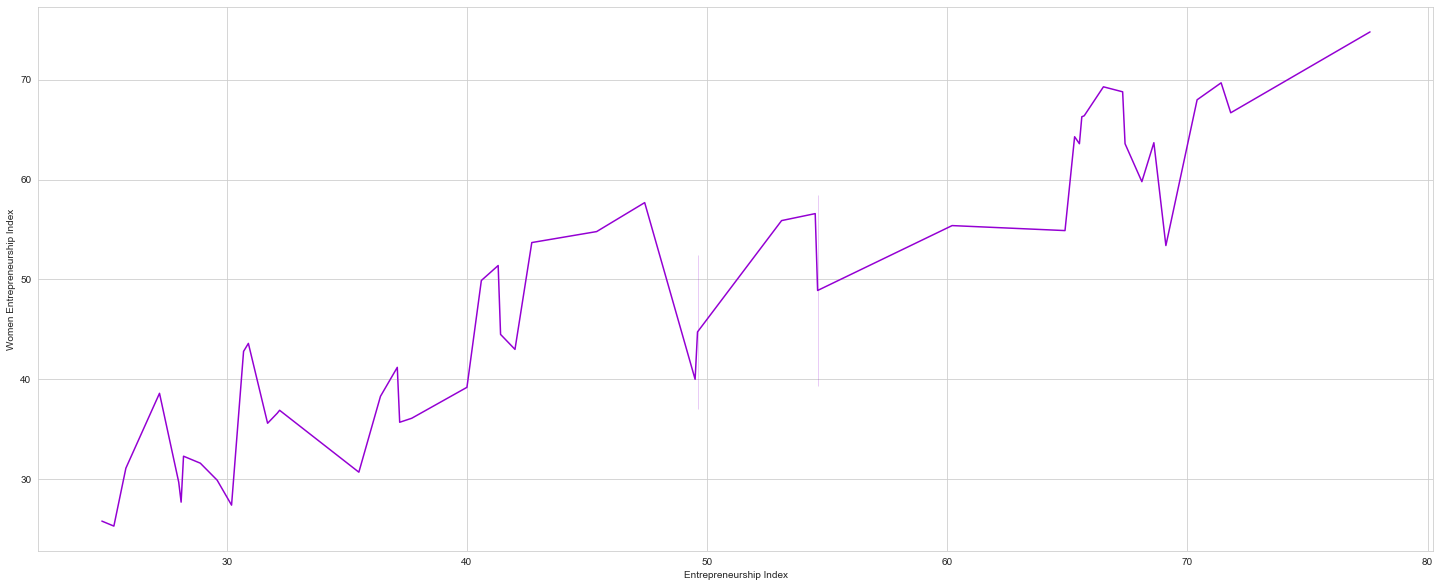

In [21]:
plt.figure(figsize = (25,10))
sb.lineplot(x = data['Entrepreneurship Index'],y = data['Women Entrepreneurship Index'],color = 'darkviolet')

<AxesSubplot:xlabel='Entrepreneurship Index', ylabel='Women Entrepreneurship Index'>

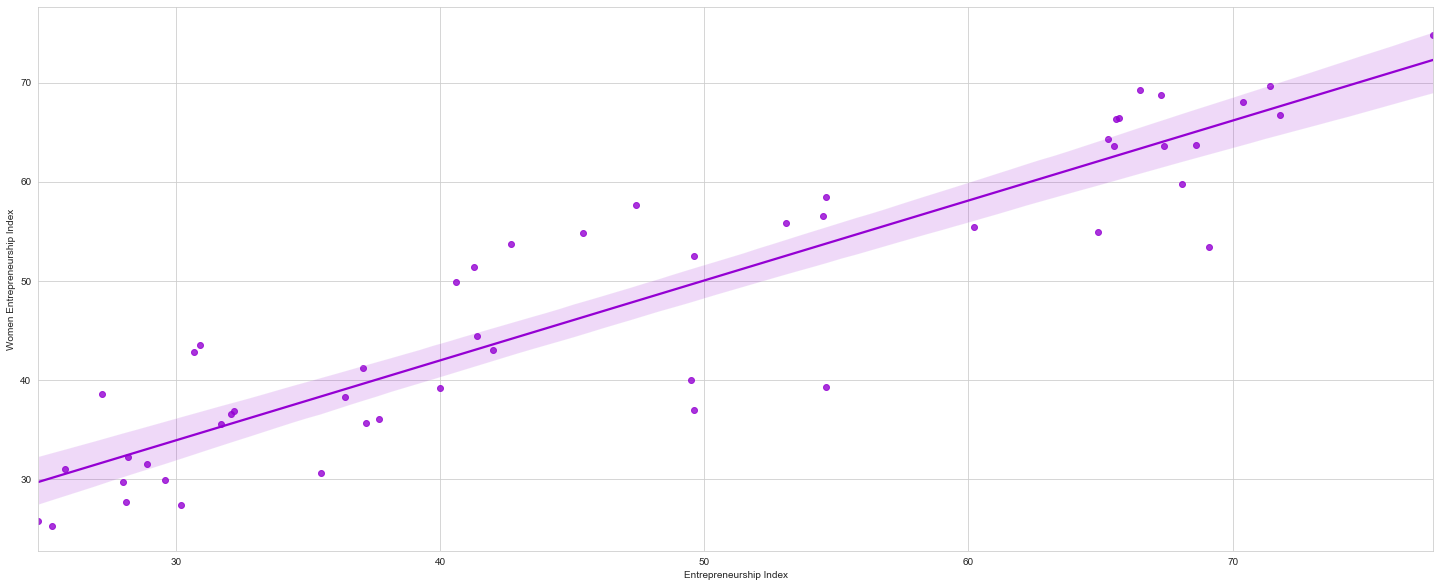

In [22]:
plt.figure(figsize = (25,10))
sb.regplot(x = data['Entrepreneurship Index'],y = data['Women Entrepreneurship Index'],color = 'darkviolet')

<AxesSubplot:xlabel='Entrepreneurship Index', ylabel='Female Labor Force Participation Rate'>

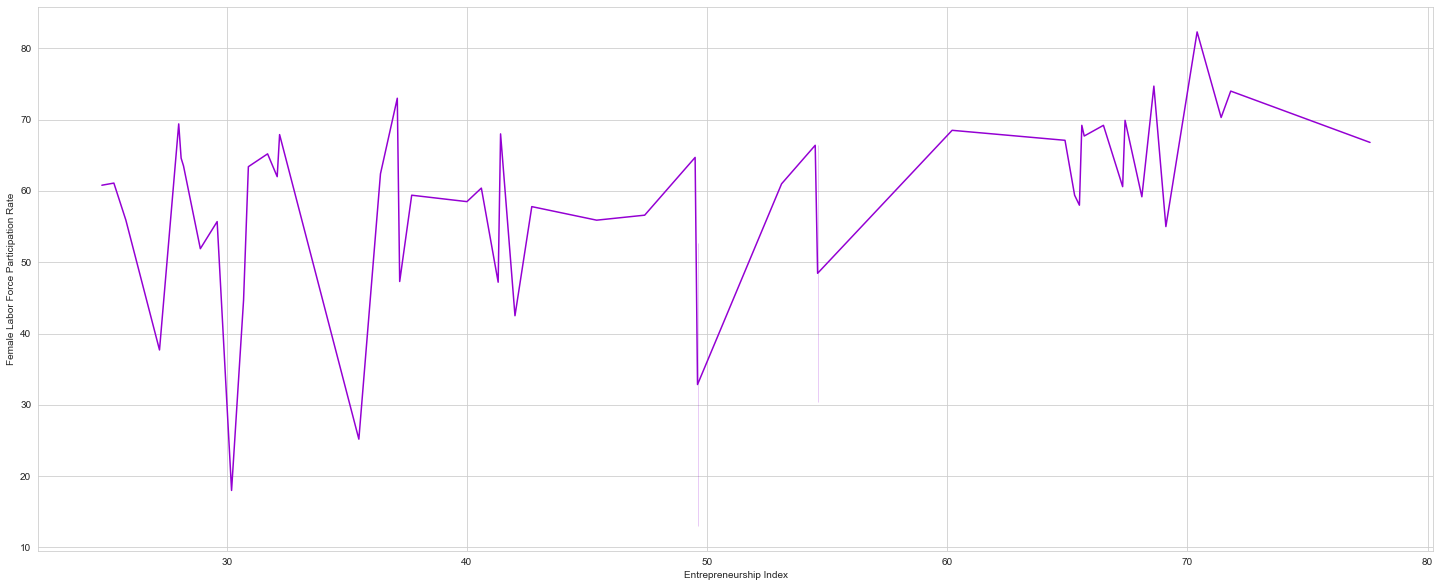

In [23]:
plt.figure(figsize = (25,10))
sb.lineplot(x = data['Entrepreneurship Index'],y = data['Female Labor Force Participation Rate'],color = 'darkviolet')

<AxesSubplot:xlabel='Entrepreneurship Index', ylabel='Female Labor Force Participation Rate'>

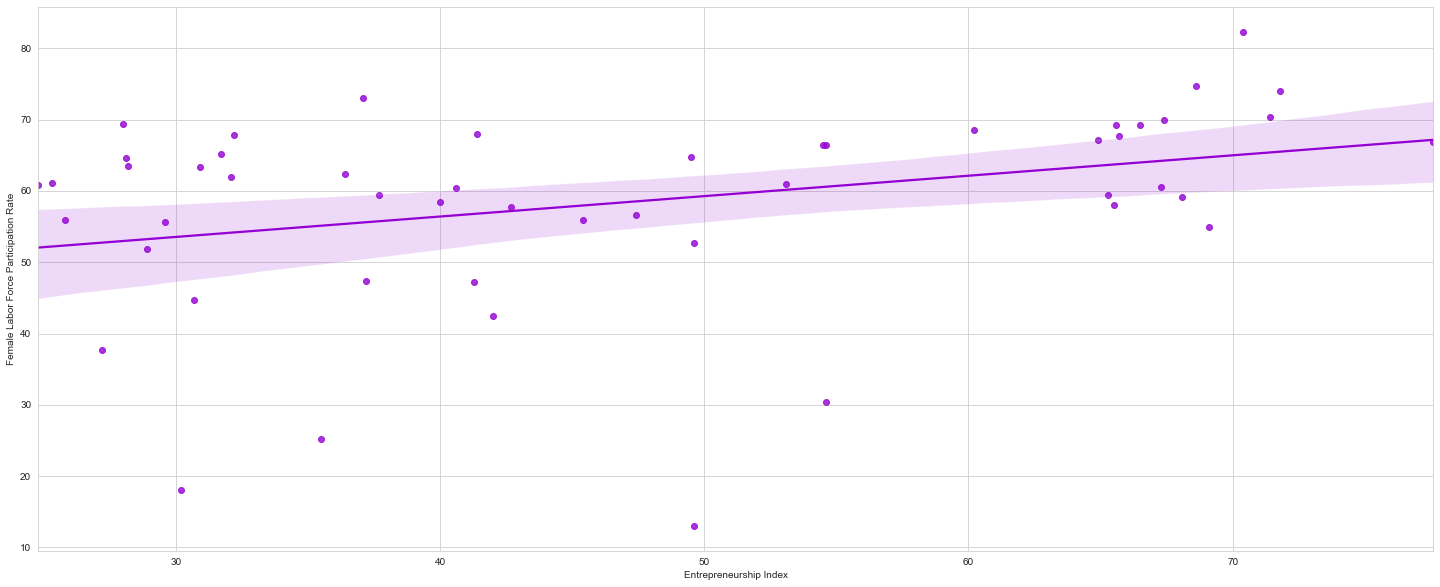

In [24]:
plt.figure(figsize = (25,10))
sb.regplot(x = data['Entrepreneurship Index'],y = data['Female Labor Force Participation Rate'],color = 'darkviolet')

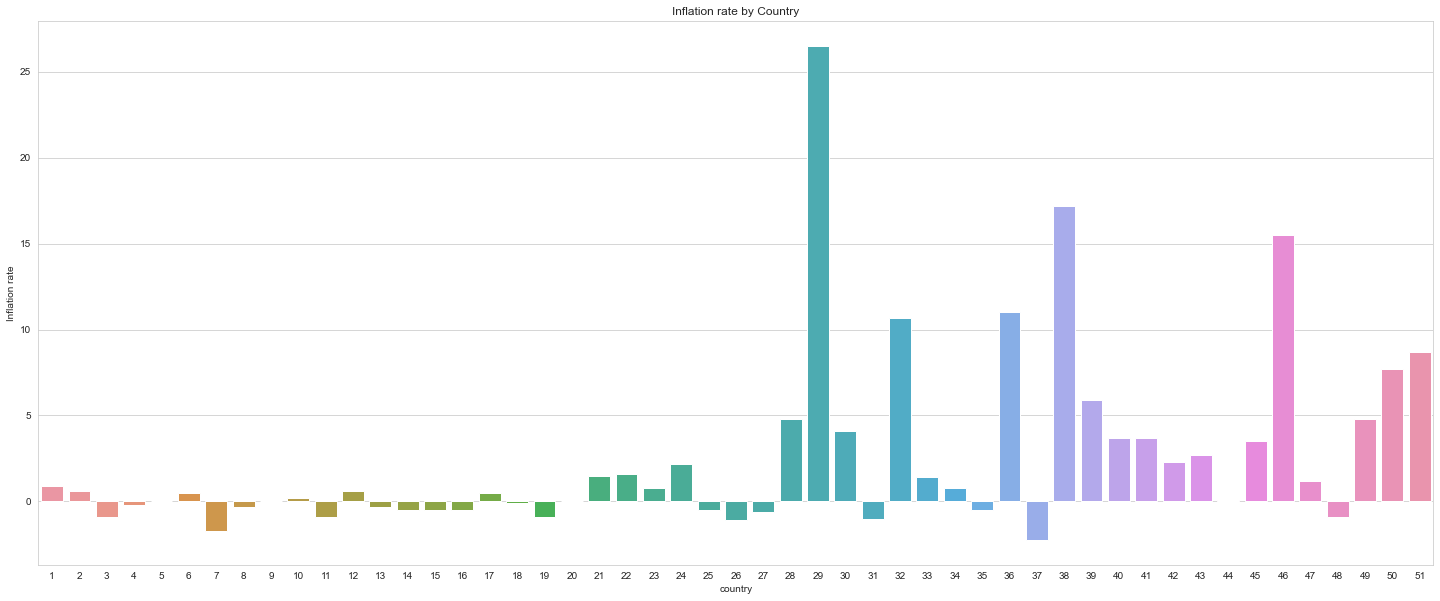

In [25]:
plt.figure(figsize = (25,10))
sb.barplot(x= data['country'],y = data['Inflation rate']);

        #'Austria':1, 'Belgium':2, 'Estonia':3, 'Finland':4, 'France':5, 'Germany':6,
       #'Greece':7, 'Ireland':8, 'Italy':9, 'Latvia':10, 'Lithuania':11, 'Netherlands':12,
       #'Slovakia':13, 'Slovenia':14, 'Spain':15, 'Croatia':16, 'Denmark':17, 'Hungary':18,
       #'Poland':19, 'Sweden':20, 'Australia':21, 'Iceland':22, 'Japan':23, 'Norway':24,
       #'Singapore':25, 'Switzerland':26, 'Taiwan':27, 'Algeria':28, 'Argentina':29,
       #'Bolivia':30, 'Bosnia and Herzegovina':31, 'Brazil':32, 'China':33,
       #'Costa Rica':34, 'Ecuador':35, 'Egypt':36, 'El Salvador':37, 'Ghana':38, 'India':39,
       #'Jamaica':40, 'Macedonia':41, 'Malaysia':42, 'Mexico':43, 'Panama':44, 'Peru':45,
       #'Russia':46, 'Saudi Arabia':47, 'Thailand':48, 'Tunisia':49, 'Turkey':50,
       #'Uruguay':51#
plt.title('Inflation rate by Country');